<a href="https://colab.research.google.com/github/Suarenz/CSEL302/blob/main/2B_CalapaoMarquez_FinalAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIBRARIES AND DATA HANDLING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('07_Instagram_Analysis.csv')

In [ ]:
df.head()

,Rank,Username,Owner,Followers(millions),Profession/Activity,Country
0,1,@instagram,Instagram,645.0,Social media platform,United States
1,2,@cristiano,Cristiano Ronaldo,594.0,Footballer,Portugal
2,3,@leomessi,Lionel Messi,476.0,Footballer,Argentina
3,4,@selenagomez,Selena Gomez,423.0,"Musician, actress, and businesswoman",United States
4,5,@kyliejenner,Kylie Jenner,395.0,Television personality and businesswoman,United States


# **DATA ANALYSIS**

In [ ]:
# Summary statistics for numerical columns
summary_stats = df.describe(include='all').transpose()
print(summary_stats)


                    count unique            top freq     mean         std  \
Rank                 50.0    NaN            NaN  NaN     25.5    14.57738   
Username               50     50     @instagram    1      NaN         NaN   
Owner                  50     50      Instagram    1      NaN         NaN   
Followers(millions)  50.0    NaN            NaN  NaN  208.976  136.262332   
Profession/Activity    50     30       Musician   12      NaN         NaN   
Country                50     19  United States   28      NaN         NaN   

                      min    25%    50%    75%    max  
Rank                  1.0  13.25   25.5  37.75   50.0  
Username              NaN    NaN    NaN    NaN    NaN  
Owner                 NaN    NaN    NaN    NaN    NaN  
Followers(millions)  78.5  96.85  161.0  288.0  645.0  
Profession/Activity   NaN    NaN    NaN    NaN    NaN  
Country               NaN    NaN    NaN    NaN    NaN  


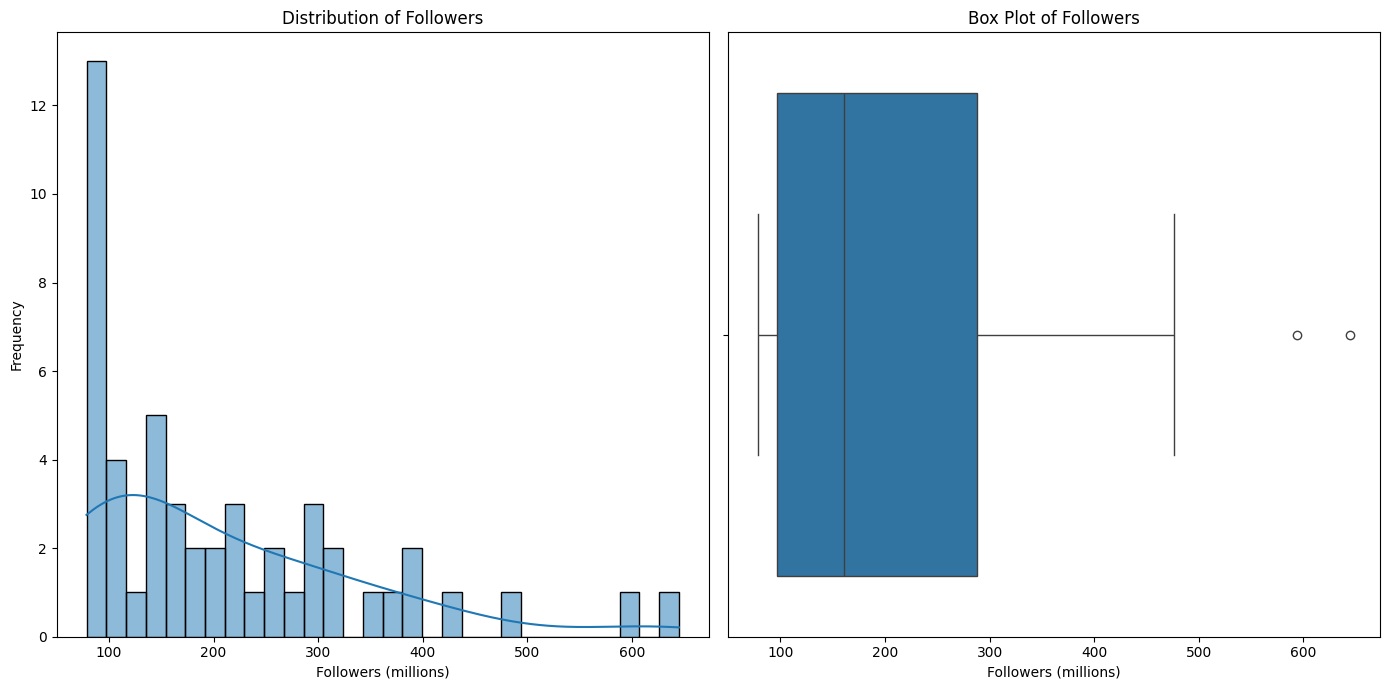

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(df['Followers(millions)'], kde=True, bins=30)
plt.title('Distribution of Followers')
plt.xlabel('Followers (millions)')
plt.ylabel('Frequency')

# Box plot for a better understanding of outliers and distribution
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Followers(millions)'])
plt.title('Box Plot of Followers')
plt.xlabel('Followers (millions)')

plt.tight_layout()
plt.show()




<ipython-input-38-9db15dc08b05>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Profession/Activity'], order=df['Profession/Activity'].value_counts().index, palette='viridis')


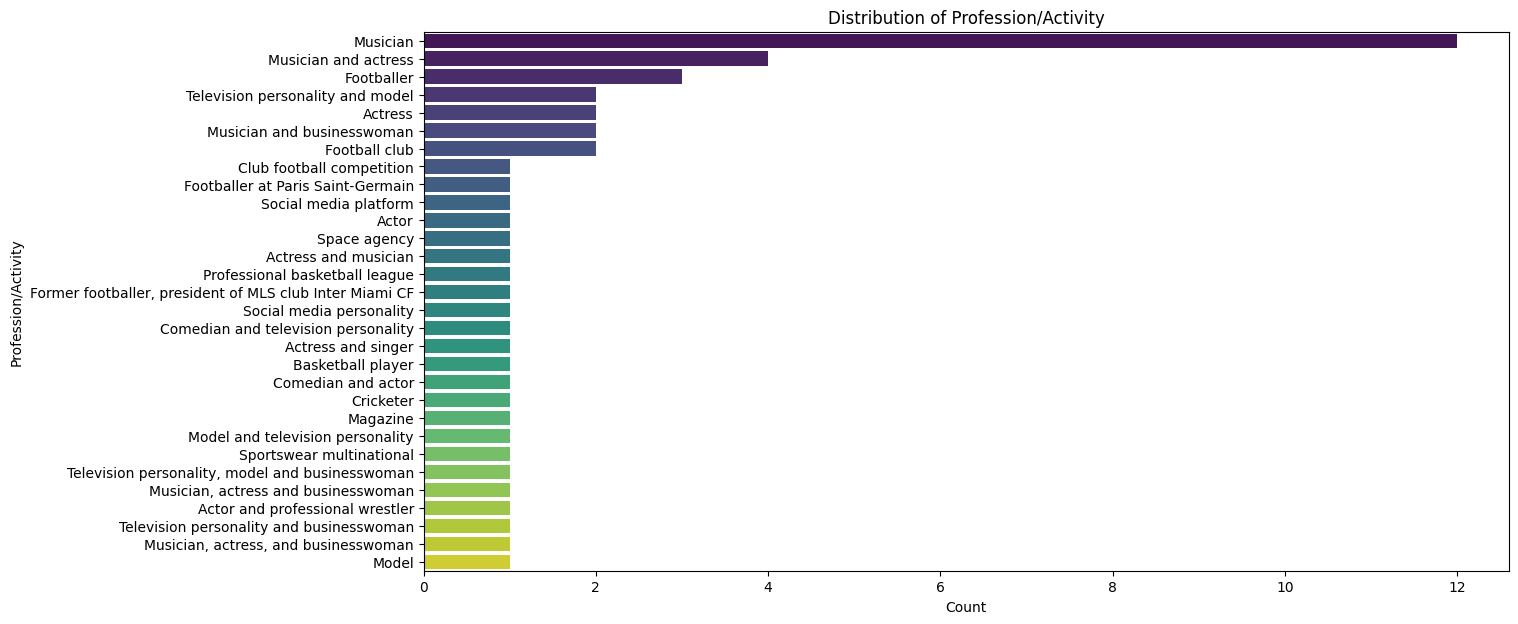

In [ ]:
plt.figure(figsize=(14, 7))

sns.countplot(y=df['Profession/Activity'], order=df['Profession/Activity'].value_counts().index, palette='viridis')
plt.title('Distribution of Profession/Activity')
plt.xlabel('Count')
plt.ylabel('Profession/Activity')

plt.show()


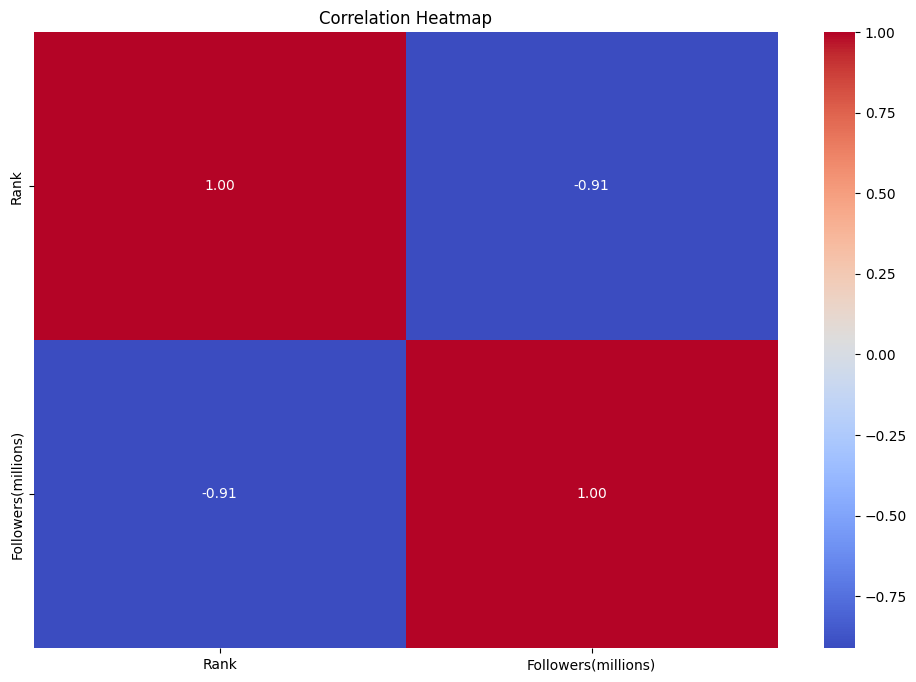

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# **ADVANCED ANALYSIS**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

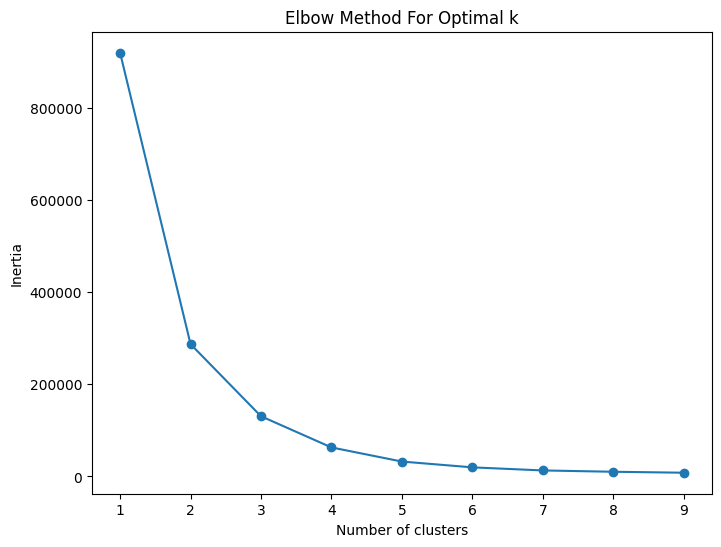

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


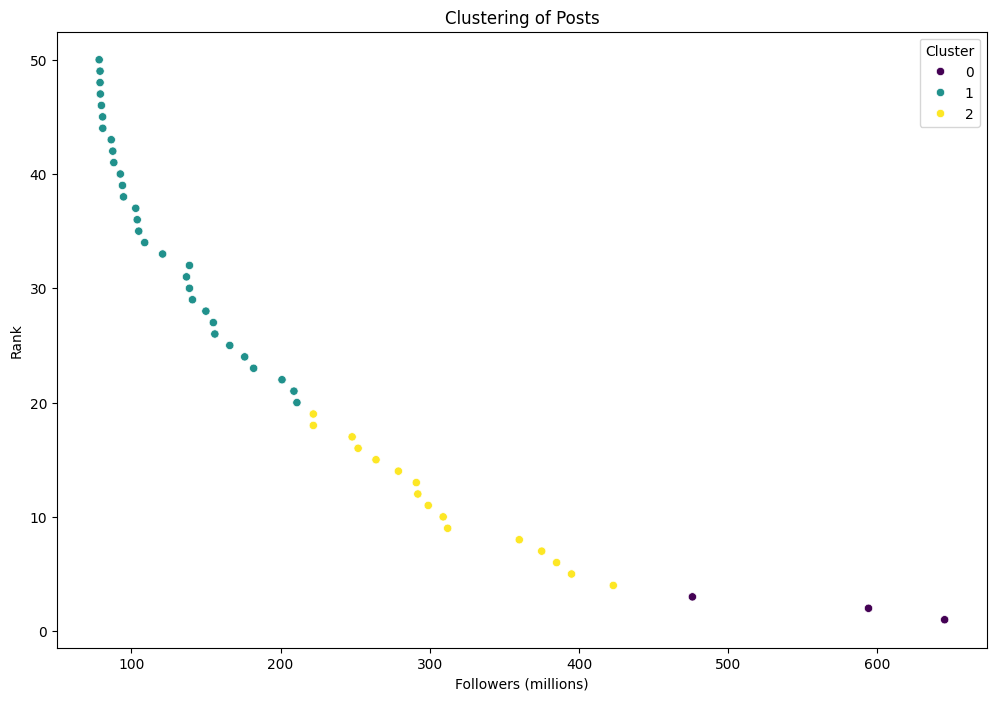

In [ ]:
numerical_columns = ['Followers(millions)', 'Rank']


X = df[numerical_columns].dropna()


inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(X)
X['cluster'] = kmeans.labels_


plt.figure(figsize=(12, 8))
sns.scatterplot(x='Followers(millions)', y='Rank', hue='cluster', data=X, palette='viridis')
plt.title('Clustering of Posts')
plt.xlabel('Followers (millions)')
plt.ylabel('Rank')
plt.legend(title='Cluster')
plt.show()

# **VISUAL INSIGHTS**

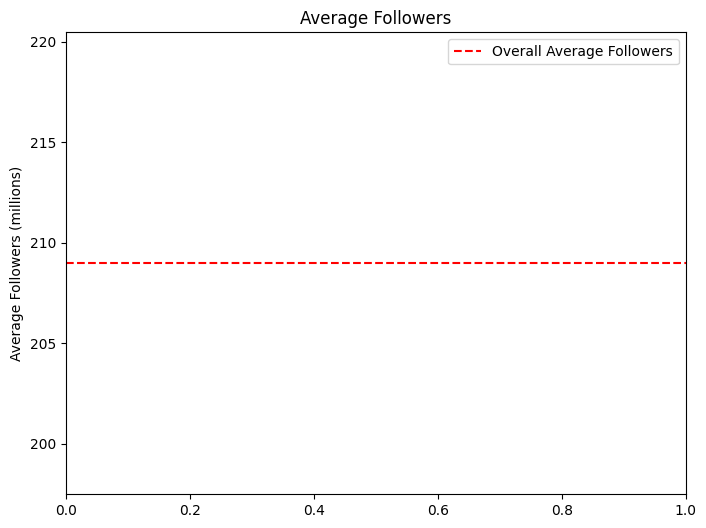

In [ ]:
overall_avg_followers = df['Followers(millions)'].mean()

# Plotting overall average followers
plt.figure(figsize=(8, 6))
plt.axhline(y=overall_avg_followers, color='r', linestyle='--', label='Overall Average Followers')
plt.title('Average Followers')
plt.ylabel('Average Followers (millions)')
plt.legend()
plt.show()